In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
loan_data = pd.read_csv("data.csv")

In [3]:
loan_data


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
loan_data.describe(include="object")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [12]:
loan_data["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [13]:
loan_data["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

# Handling Null Values

In [22]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [46]:
loan_data["Gender"] = loan_data["Gender"].fillna(loan_data["Gender"].mode()[0])
loan_data["Married"] = loan_data["Married"].fillna(loan_data["Married"].mode()[0])
loan_data["Dependents"] = loan_data["Dependents"].fillna(loan_data["Dependents"].mode()[0])

In [38]:
loan_data["Self_Employed"] = loan_data["Self_Employed"].fillna(loan_data["Self_Employed"].mode()[0])

In [39]:
loan_data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [41]:
loan_data["LoanAmount"] = loan_data["LoanAmount"].fillna(loan_data["LoanAmount"].median())
loan_data["Loan_Amount_Term"] = loan_data["Loan_Amount_Term"].fillna(loan_data["Loan_Amount_Term"].median())
loan_data["Credit_History"] = loan_data["Credit_History"].fillna(loan_data["Credit_History"].median())

In [47]:
loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Outliers Detection and Handling

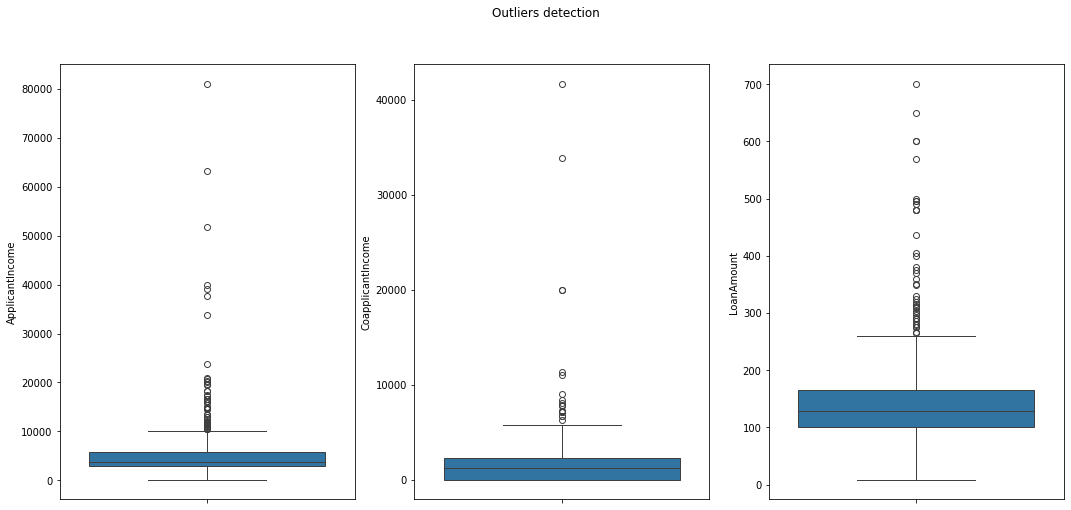

In [63]:

plt.rcParams["figure.figsize"] = (18,8)

plt.subplot(1,3,1)

sns.boxplot(loan_data["ApplicantIncome"])

plt.subplot(1,3,2)

sns.boxplot(loan_data["CoapplicantIncome"])

plt.subplot(1,3,3)

sns.boxplot(loan_data["LoanAmount"])

plt.suptitle("Outliers detection")

plt.show()

In [64]:
print("Before removing outliers",loan_data.shape)

loan_data = loan_data[loan_data["ApplicantIncome"]<25000]

print("After removing outliers",loan_data.shape)

Before removing outliers (614, 13)
After removing outliers (607, 13)


In [65]:
print("Before removing outliers",loan_data.shape)

loan_data = loan_data[loan_data["CoapplicantIncome"]<12000]

print("After removing outliers",loan_data.shape)

Before removing outliers (607, 13)
After removing outliers (603, 13)


In [67]:
print("Before removing outliers",loan_data.shape)

loan_data = loan_data[loan_data["LoanAmount"]<400]

print("After removing outliers",loan_data.shape)

Before removing outliers (603, 13)
After removing outliers (591, 13)


# Analysis

<Axes: xlabel='LoanAmount', ylabel='Count'>

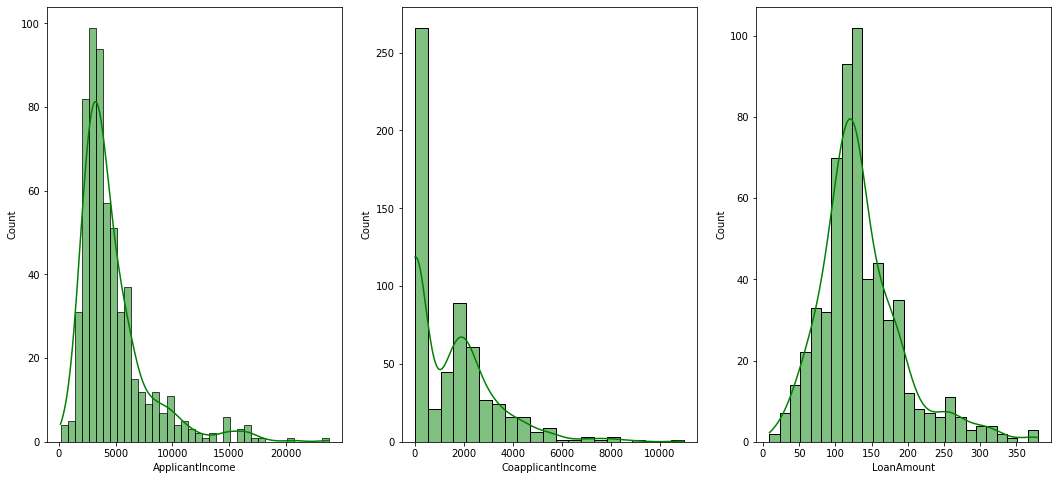

In [89]:
plt.subplot(1,3,1)

sns.histplot(loan_data["ApplicantIncome"],color="green",kde=True)

plt.subplot(1,3,2)

sns.histplot(loan_data["CoapplicantIncome"],color="green",kde=True)

plt.subplot(1,3,3)

sns.histplot(loan_data["LoanAmount"],color="green",kde=True)

In [91]:
num = loan_data.select_dtypes("number").columns.tolist()
cat = loan_data.select_dtypes("object").columns.tolist()

In [92]:
num

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [93]:
cat

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

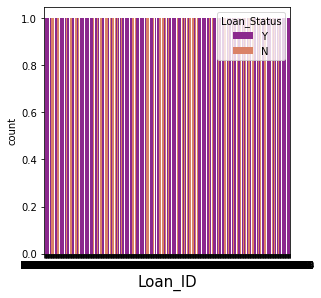

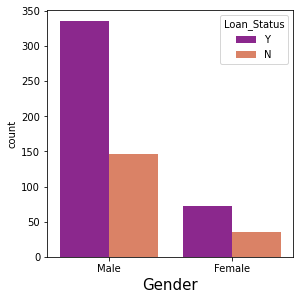

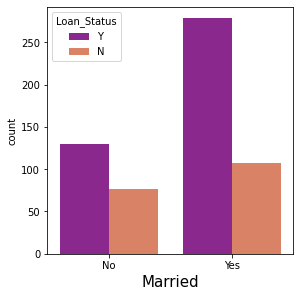

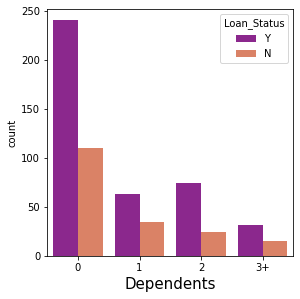

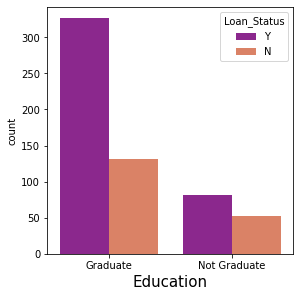

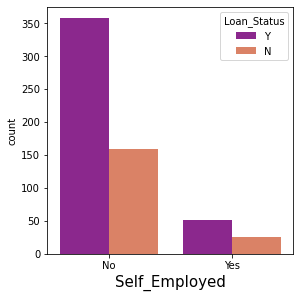

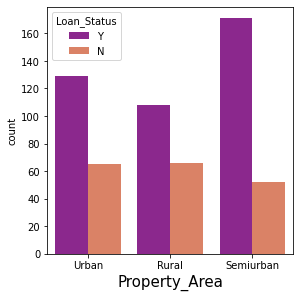

In [94]:
for i in cat[:-1]:
    plt.figure(figsize=(15,10))
    plt.subplot(2,3,1)
    sns.countplot(x=i,hue="Loan_Status",data=loan_data,palette="plasma")
    plt.xlabel(i,fontsize=15)

In [96]:
loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [95]:
print(pd.crosstab(loan_data["Loan_Status"],loan_data["Married"]))

Married       No  Yes
Loan_Status          
N             76  107
Y            130  278


In [98]:
print(pd.crosstab(loan_data["Loan_Status"],loan_data["Education"]))

Education    Graduate  Not Graduate
Loan_Status                        
N                 131            52
Y                 326            82


In [99]:
print(pd.crosstab(loan_data["Loan_Status"],loan_data["Self_Employed"]))

Self_Employed   No  Yes
Loan_Status            
N              158   25
Y              357   51


 # Data Preparation

In [101]:
loan_data.select_dtypes("object").head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [102]:
loan_data = loan_data.drop(["Loan_ID"],axis=1)

In [103]:
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [105]:
loan_data["Gender"] = loan_data["Gender"].replace(("Male","Female"),(1,0))

In [108]:
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [114]:
loan_data["Gender"] = loan_data["Gender"].replace(("Male","Female"),(1,0))
loan_data["Married"] = loan_data["Married"].replace(("Yes","No"),(1,0))
loan_data["Self_Employed"] = loan_data["Self_Employed"].replace(("Yes","No"),(1,0))
loan_data["Education"] = loan_data["Education"].replace(("Graduate","Not Graduate"),(1,0))
loan_data["Loan_Status"] = loan_data["Loan_Status"].replace(("Y","N"),(1,0))

In [116]:
loan_data.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,Urban,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,Urban,1
6,1,1,0,0,0,2333,1516.0,95.0,360.0,1.0,Urban,1
7,1,1,3+,1,0,3036,2504.0,158.0,360.0,0.0,Semiurban,0
8,1,1,2,1,0,4006,1526.0,168.0,360.0,1.0,Urban,1
9,1,1,1,1,0,12841,10968.0,349.0,360.0,1.0,Semiurban,0


In [117]:
loan_data["Property_Area"] = loan_data["Property_Area"].replace(("Urban","Semiurban","Rural"),(1,1,0))

In [118]:
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,1,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1


In [122]:
loan_data["Dependents"] = loan_data["Dependents"].replace(("0","1","2","3+"),(0,1,1,1))

In [123]:
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,1,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1


# Train Test Split

In [125]:
from sklearn.model_selection import train_test_split

In [127]:
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,1,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1


In [132]:
y = loan_data["Loan_Status"]
X = loan_data.drop(["Loan_Status"],axis=1)

In [156]:
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

In [157]:
x_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
169,1,1,1,1,0,8000,0.0,200.0,360.0,1.0,1
244,1,1,0,0,0,3406,4417.0,123.0,360.0,1.0,1
222,1,0,0,1,0,2971,2791.0,144.0,360.0,1.0,1
241,1,1,1,0,0,2510,1983.0,140.0,180.0,1.0,1
442,1,0,1,0,0,4707,1993.0,148.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
582,0,1,0,1,0,3166,0.0,36.0,360.0,1.0,1
310,0,0,0,1,0,2917,0.0,84.0,360.0,1.0,1
206,0,0,0,1,0,3244,0.0,80.0,360.0,1.0,1
255,0,0,1,1,0,3083,0.0,255.0,360.0,1.0,0


# Model Building

In [158]:
from sklearn.linear_model import LogisticRegression

In [159]:
model = LogisticRegression()

In [160]:
model.fit(x_train,y_train)

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [161]:
y_pred = model.predict(x_test)

In [162]:
from sklearn.metrics import accuracy_score

In [163]:
print("Accuracy of our Model is : ",accuracy_score(y_test,y_pred))

Accuracy of our Model is :  0.8403361344537815


In [166]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [167]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.47      0.63        34
           1       0.82      0.99      0.90        85

    accuracy                           0.84       119
   macro avg       0.88      0.73      0.76       119
weighted avg       0.86      0.84      0.82       119



In [183]:
predictions_prob = model.predict_proba(x_test)
predictions  = model.predict(x_test) 

In [184]:
predictions


array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [190]:
x_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
154,1,0,0,1,0,3254,0.0,50.0,360.0,1.0,1
447,1,1,0,1,0,3539,1376.0,55.0,360.0,1.0,0
398,1,0,0,0,0,3902,1666.0,109.0,360.0,1.0,0
170,1,1,0,0,0,1820,1769.0,95.0,360.0,1.0,0
325,1,1,1,1,1,8666,4983.0,376.0,360.0,0.0,0


In [189]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 154 to 387
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             119 non-null    int64  
 1   Married            119 non-null    int64  
 2   Dependents         119 non-null    int64  
 3   Education          119 non-null    int64  
 4   Self_Employed      119 non-null    int64  
 5   ApplicantIncome    119 non-null    int64  
 6   CoapplicantIncome  119 non-null    float64
 7   LoanAmount         119 non-null    float64
 8   Loan_Amount_Term   119 non-null    float64
 9   Credit_History     119 non-null    float64
 10  Property_Area      119 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 11.2 KB
